In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})

In [3]:
fullvaccine_df = pd.read_csv('full_vaccine.csv')
fullvaccine_df = fullvaccine_df.rename(columns={"State Code": "Code"})
fullvaccine_df.drop(columns='vaccine',inplace=True)
fullvaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               59 non-null     object 
 1   full_vaccine_rate  59 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [11]:
merged_df = collective_df.merge(fullvaccine_df,how='outer',on='Code')
merged_df

,Code,Index,full_vaccine_rate
0,HI,91.0,0.817
1,LA,72.0,0.551
2,SC,70.0,0.600
3,MS,64.0,0.538
4,MD,63.0,0.799
5,UT,61.0,0.669
6,VA,60.0,0.768
7,GA,60.0,0.575
8,CA,60.0,0.749
9,NJ,59.0,0.793


In [14]:
merged_df = merged_df[~merged_df.Index.isna()]

In [15]:
income = pd.read_csv('income.csv')
list_dates = ['2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008']
for i in list_dates:
    income[i] = income[i].str.replace(',', '')
    income[i] = income[i].astype(float)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    51 non-null     object 
 1   2018    51 non-null     float64
 2   2017    51 non-null     float64
 3   2016    51 non-null     float64
 4   2015    51 non-null     float64
 5   2014    51 non-null     float64
 6   2013    51 non-null     float64
 7   2012    51 non-null     float64
 8   2011    51 non-null     float64
 9   2010    51 non-null     float64
 10  2009    51 non-null     float64
 11  2008    51 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.9+ KB


In [16]:
income['avg_income'] = income[list_dates].mean(axis = 1)
income.drop(columns=list_dates, inplace=True)
income.head()

,Code,avg_income
0,AL,36682.545455
1,AK,53672.272727
2,AZ,38334.454545
3,AR,37141.090909
4,CA,50306.000000


In [17]:
merged_df=merged_df.merge(income,on='Code',how='outer')
merged_df.head()

,Code,Index,full_vaccine_rate,avg_income
0,HI,91.0,0.817,45581.636364
1,LA,72.0,0.551,41293.909091
2,SC,70.0,0.600,37192.363636
3,MS,64.0,0.538,33994.818182
4,MD,63.0,0.799,53730.090909


In [19]:
merged_df = merged_df[~merged_df.Index.isna()]

eval_env: 1


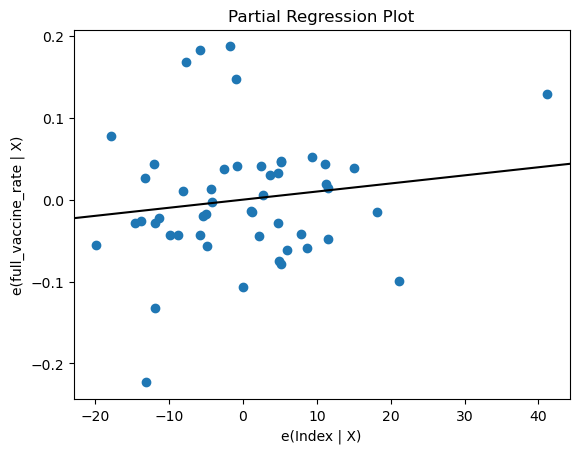

In [20]:
sm.graphics.plot_partregress(data = merged_df,endog = 'full_vaccine_rate',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False)
plt.show()

In [21]:
yale_data = pd.read_csv('yale.csv')
state_alpha_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [23]:
#percent who say climate change is due to human activities -human
#2009 missing
prim = yale_data[(yale_data.varname == 'human') & (yale_data.GeoType == 'State')]
prim = prim[['GeoName','2018','2017','2016','2015','2014','2013','2012','2011','2010','2008']]

In [30]:
prim = prim[~prim['2018'].isna()]

In [31]:
#removed 2009
income = pd.read_csv('income.csv')
list_dates = ['2018','2017','2016','2015','2014','2013','2012','2011','2010','2008']
for i in list_dates:
    income[i] = income[i].str.replace(',', '')
    income[i] = income[i].astype(float)

income['avg_income'] = income[list_dates].mean(axis = 1)
income.drop(columns=list_dates, inplace=True)
income.head()


,Code,2009,avg_income
0,AL,"32,769",37073.9
1,AK,"47,258",54313.7
2,AZ,"33,524",38815.5
3,AR,"31,472",37708.0
4,CA,"41,689",51167.7


In [35]:
income.drop(columns='2009', inplace=True)

In [33]:
prim['human_climate'] = prim[list_dates].mean(axis = 1)
prim.drop(columns=list_dates,inplace=True)
prim.head()

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_3350/2492098662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prim['human_climate'] = prim[list_dates].mean(axis = 1)
/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_3350/2492098662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prim.drop(columns=list_dates,inplace=True)


,GeoName,human_climate
459,Alabama,45.593805
460,Alaska,48.039619
461,Arizona,50.227360
462,Arkansas,45.906764
463,California,57.164710


In [34]:
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim.drop(columns='GeoName',inplace=True)
prim.head()

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_3350/2608997339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prim['Code'] = prim['GeoName'].map(state_alpha_codes)
/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_3350/2608997339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prim.drop(columns='GeoName',inplace=True)


,human_climate,Code
459,45.593805,AL
460,48.039619,AK
461,50.227360,AZ
462,45.906764,AR
463,57.164710,CA


In [36]:
merged_df = prim.merge(income,on='Code',how='outer')
merged_df.head()

,human_climate,Code,avg_income
0,45.593805,AL,37073.9
1,48.039619,AK,54313.7
2,50.227360,AZ,38815.5
3,45.906764,AR,37708.0
4,57.164710,CA,51167.7


In [37]:
merged_df=merged_df.merge(collective_df,on='Code',how='outer')
merged_df

,human_climate,Code,avg_income,Index
0,45.593805,AL,37073.9,57.0
1,48.039619,AK,54313.7,48.0
2,50.227360,AZ,38815.5,49.0
3,45.906764,AR,37708.0,54.0
4,57.164710,CA,51167.7,60.0
5,51.623168,CO,48966.5,36.0
6,54.857233,CT,65704.9,50.0
7,51.251374,DE,46002.2,55.0
8,59.093631,DC,71515.2,NaN
9,50.851031,FL,43769.6,54.0


In [38]:
merged_df=merged_df[~merged_df.Index.isna()]

eval_env: 1


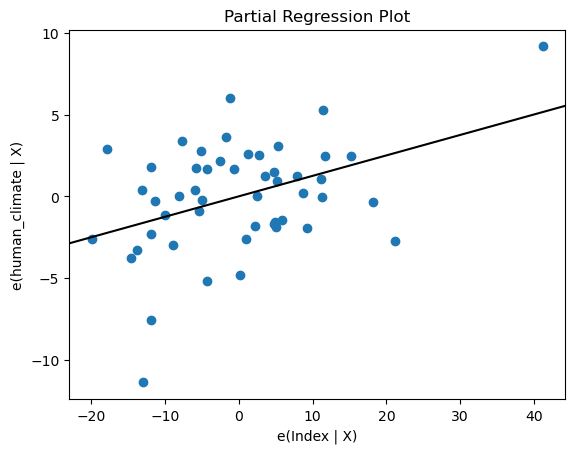

In [39]:
sm.graphics.plot_partregress(data = merged_df,endog = 'human_climate',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False)
plt.show()

In [42]:
#consensus - percentage who believe that most scientists think global warming is happening
prim = yale_data[(yale_data.varname == 'consensus') & (yale_data.GeoType == 'State')]

prim = prim[['GeoName','2018','2017','2016','2015','2014','2013','2012','2011','2010','2008']]
prim = prim[~prim['2018'].isna()]

In [43]:
prim['consensus_climate'] = prim[list_dates].mean(axis = 1)
prim.drop(columns=list_dates,inplace=True)
prim.head()

,GeoName,consensus_climate
51,Alabama,33.574974
52,Alaska,43.283741
53,Arizona,41.732894
54,Arkansas,34.373566
55,California,48.852750


In [44]:
prim['Code'] = prim['GeoName'].map(state_alpha_codes)
prim.drop(columns='GeoName',inplace=True)

In [45]:
merged_df = prim.merge(income,on='Code',how='outer')
merged_df=merged_df.merge(collective_df,on='Code',how='outer')
merged_df

,consensus_climate,Code,avg_income,Index
0,33.574974,AL,37073.9,57.0
1,43.283741,AK,54313.7,48.0
2,41.732894,AZ,38815.5,49.0
3,34.373566,AR,37708.0,54.0
4,48.852750,CA,51167.7,60.0
5,44.361295,CO,48966.5,36.0
6,48.570842,CT,65704.9,50.0
7,43.632602,DE,46002.2,55.0
8,54.202080,DC,71515.2,NaN
9,42.245052,FL,43769.6,54.0


In [46]:
merged_df=merged_df[~merged_df.Index.isna()]

eval_env: 1


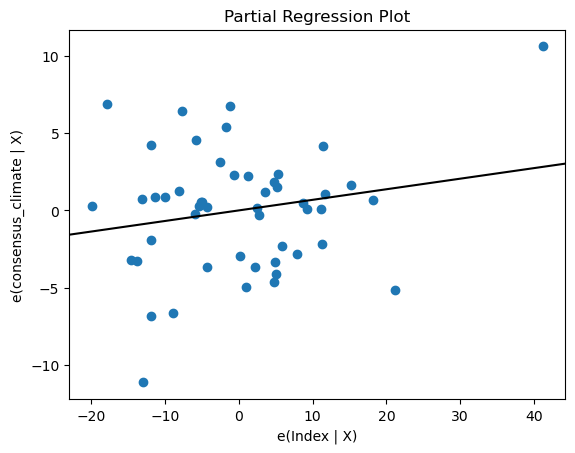

In [47]:
sm.graphics.plot_partregress(data = merged_df,endog = 'consensus_climate',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False)
plt.show()